ЛР 2 Классификация

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Загружаем данные в датасет. Данные взяты [здесь] [https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset]

In [24]:
dt = pd.read_csv('/content/Depression Student Dataset.csv')
dt_graph = pd.read_csv('/content/Depression Student Dataset.csv')

Анализ данных

In [25]:
dt.shape

(502, 11)

In [26]:
dt.head(10)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
5,Male,19,4.0,4.0,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes
6,Female,34,4.0,2.0,More than 8 hours,Moderate,Yes,6,2,No,Yes
7,Female,20,4.0,1.0,More than 8 hours,Healthy,Yes,3,4,Yes,Yes
8,Female,33,1.0,4.0,More than 8 hours,Moderate,No,10,3,No,No
9,Male,33,4.0,3.0,Less than 5 hours,Unhealthy,Yes,10,1,No,Yes


In [27]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [28]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [29]:
dt.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [31]:
dt['Study Satisfaction'].unique()

array([4., 5., 3., 2., 1.])

In [32]:
dt['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,116
3.0,103
2.0,100
5.0,97
1.0,86


Нормализация данных

In [33]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dt[['nAge', 'nAcademic Pressure', 'nFinancial Stress']] = scaler_mm.fit_transform(dt[['Age', 'Academic Pressure', 'Financial Stress']])
dt.head()

dt.drop(columns= ['Academic Pressure', 'Financial Stress', 'Age'], inplace=True)

Визуализация данных

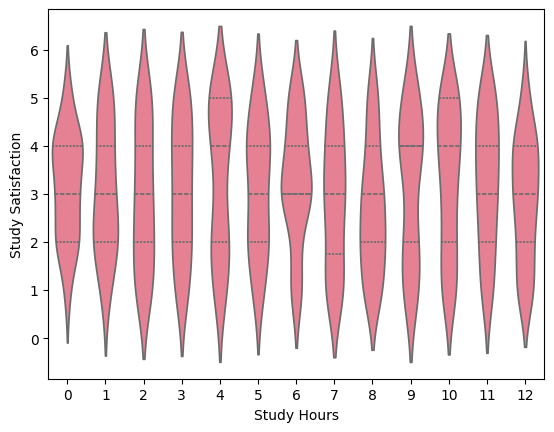

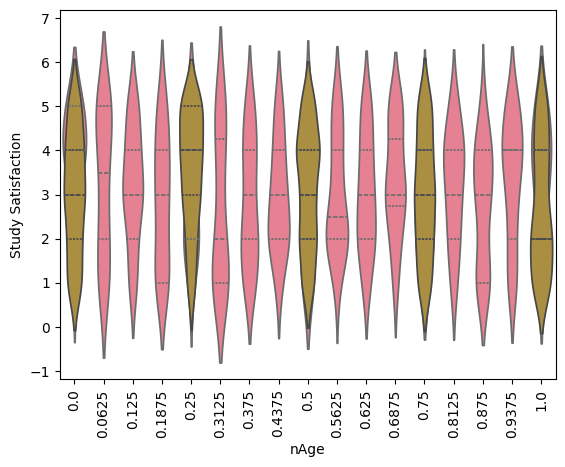

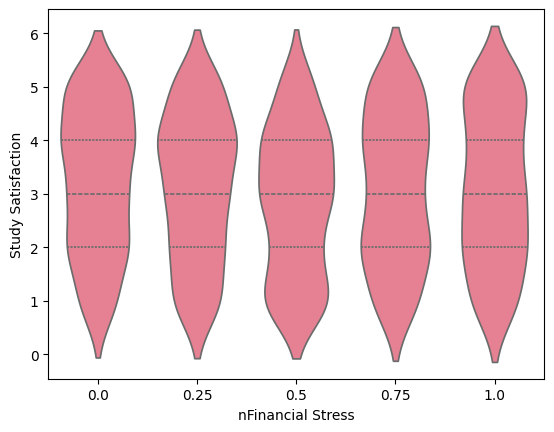

In [34]:
sns.violinplot(y='Study Satisfaction', x='Study Hours', data=dt, inner='quartile')
plt.show()
sns.violinplot(y='Study Satisfaction', x='nAge', data=dt, inner='quartile')
plt.xticks(rotation=90)
sns.violinplot(y='Study Satisfaction', x='nAcademic Pressure', data=dt, inner='quartile')
plt.show()
sns.violinplot(y='Study Satisfaction', x='nFinancial Stress', data=dt, inner='quartile')
plt.show()

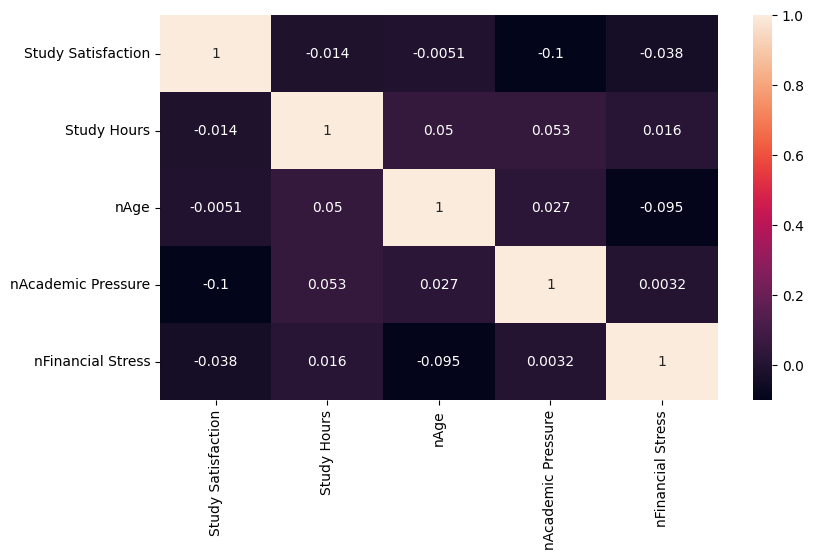

In [35]:
plt.figure(figsize=(9,5))
sns.heatmap(dt.corr(numeric_only = True), annot=True)
plt.show()

Построение модели

In [36]:
X = dt.drop(['Study Satisfaction'], axis=1)
y = dt['Study Satisfaction']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (502, 10) | y shape: (502,) 


In [49]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

t_test_result = stats.ttest_ind(a=y_train, b=y_test)

#print(t_test_result)

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [52]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Male'


In [54]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

cart_pred_res = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_pred_res)

print(f'CART accuracy: {cart_accuracy}')
print(f'CART prediction: {cart_pred_res}')

ValueError: could not convert string to float: 'Male'

In [41]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Для визуализации выберем два признака
X_2d = X_train[['nAcademic Pressure', 'nFinancial Stress']].values
y_2d = y_train.values

# Инициализация и обучение модели SVC с оптимизированными параметрами (или gamma='auto')
svc_model = SVC(gamma='auto')
svc_model.fit(X_2d, y_2d)

# Вычисление точности
svc_pred_res = svc_model.predict(X_test[['nAcademic Pressure', 'nFinancial Stress']])
svc_accuracy = accuracy_score(y_test, svc_pred_res)

# Визуализация областей решений
plt.figure(figsize=(8, 6))
plt.title(f'SVC Decision Surface (accuracy: {svc_accuracy:.2f})')
plot_decision_regions(X=X_2d, y=y_2d, clf=svc_model, legend=2)

plt.xlabel('nAcademic Pressure')
plt.ylabel('nFinancial Stress')
plt.show()


KeyError: "None of [Index(['nTime', 'nArea'], dtype='object')] are in the [columns]"

In [42]:
from sklearn import metrics
import numpy as np

accuracy = metrics.accuracy_score(y_test, svc_pred_res)
print(f'Accuracy: {round(accuracy, 2)}')

recall = metrics.recall_score(y_test, svc_pred_res, average="weighted")
precision = metrics.precision_score(y_test, svc_pred_res, average="weighted")
print("Recall (полнота для всех классов):", round(recall, 2))
print("Precision (точность для всех классов):", round(precision, 2))

print("Classification Report:")
print(metrics.classification_report(y_test, svc_pred_res, target_names=[str(i) for i in np.unique(y_test)]))


NameError: name 'svc_pred_res' is not defined